In [1]:
#First we import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
#import our data set to jupyter notebook
#data is downloaded from kaggle


In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_6d52ce78ace646b081d6037ccd181ffd = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_6d52ce78ace646b081d6037ccd181ffd = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_6d52ce78ace646b081d6037ccd181ffd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Qi3SX0-QXhmxYBy1HvsuLPmhxGNtTjMdF_4t9Ew75Jnl',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_6d52ce78ace646b081d6037ccd181ffd)

body = client_6d52ce78ace646b081d6037ccd181ffd.get_object(Bucket='predictingthediabetes-donotdelete-pr-cofmmbtozo0axg',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# from the metadata on the data source we have the following information about the features
#pregnancies-no of preg.
##glucose-Plasma glucose concentration a 2 hours in an oral glucose tolerance tes
###BloodPressure-mm Hg

In [6]:
df.isnull().sum()
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

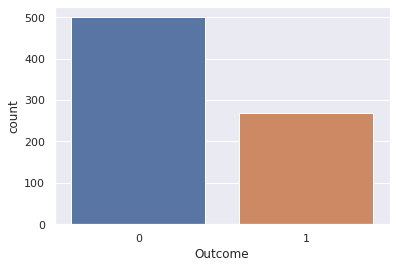

In [7]:
sns.countplot(df['Outcome'],label='count')

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

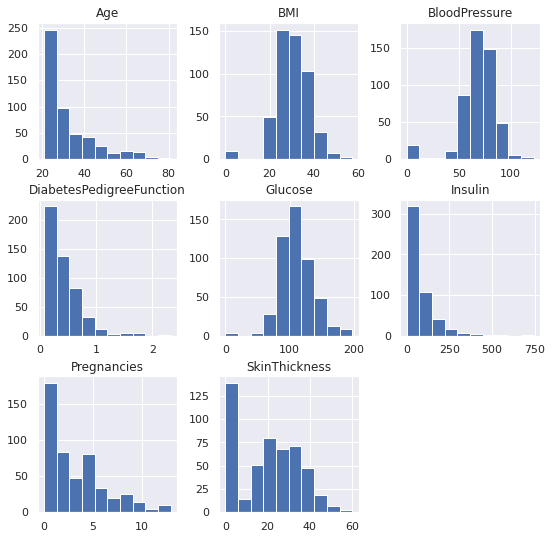

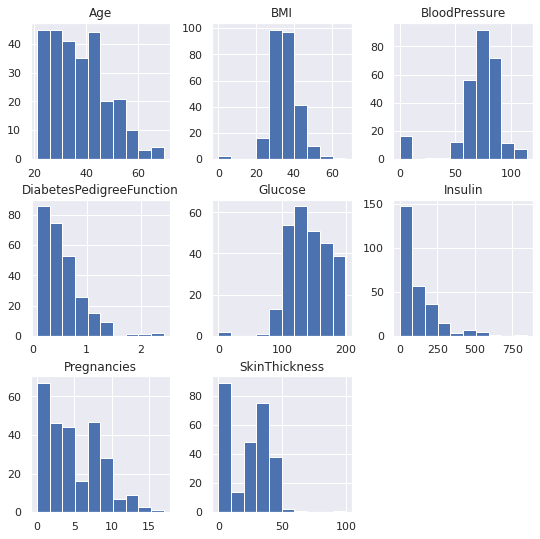

In [8]:
df.groupby('Outcome').hist(figsize=(9,9))

# Data Cleaning
From the histograms we can observe that many patients have zero BMI,bloodpressure,glucose,insulin,skin thickness but we cannot cannot remove features like insulin and skin thickness because we will loose a valuable informations and we also cannot replace by mean value because suppose we replace blood pressure with mean value then it will send wrong message to the model.For insulin and skin thickness we also cannot remove zero values because they consist of major part of the data.So we will only remove that rows for which all together  values pf bmi,bloodpressure and glucose are zero.

In [9]:
df_mod=df[(df.BMI!=0)&(df.BloodPressure!=0)&(df.Glucose!=0)]
df_mod.shape

(724, 9)

# Correlated feature check
Helper function that display correlation by color. Red is most correlated and blue is least

In [10]:
def plot_cor(df_mod,size=10):
    corr = df_mod.corr() #dataframe correlation function
    fig,ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

In [11]:
df_mod.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,-0.095683,-0.080059,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.074381,0.337896,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.011777,-0.046856,0.287403,-0.000075,0.324897,0.166703
SkinThickness,-0.095683,0.074381,0.011777,1.000000,0.420874,0.401528,0.176253,-0.128908,0.092030
Insulin,-0.080059,0.337896,-0.046856,0.420874,1.000000,0.191831,0.182656,-0.049412,0.145488
BMI,0.012342,0.223276,0.287403,0.401528,0.191831,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.176253,0.182656,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,-0.128908,-0.049412,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.092030,0.145488,0.299375,0.184947,0.245741,1.000000


In [12]:
feature_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
x=df_mod[feature_names]
y=df_mod['Outcome']

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [14]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('xgbc',XGBClassifier()))
models.append(('adab',AdaBoostClassifier()))

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Stratify Parameter
stratify parameter ensures that the train_test_split when it is done it will have same distribution of classes as in the original dataset.

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=df_mod.Outcome,random_state=0)

In [17]:
len(x_train)

543

In [18]:
len(x_test)

181

In [19]:
names = []
scores = []
for name,model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))
    names.append(name)
    

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
result_split=pd.DataFrame({'Name':names,'Score':scores})
print(result_split)

   Name     Score
0   KNN  0.729282
1   SVC  0.740331
2    LR  0.762431
3    DT  0.745856
4   GNB  0.734807
5    RF  0.767956
6    GB  0.773481
7  xgbc  0.779006
8  adab  0.779006


# K Cross Validation
This method splits the data into k fold. Then use 1 fold as the testing set and union of other as a training set.
The process will follow above steps k times using different folds as testing set each time .The average testing accuracy of the process is testing accuracy


# PROS:
More accurate estimate of out-of-sample-accuracy. more efficient use of data

# Cons:
more slower than train/test split

In [21]:
from sklearn.model_selection import KFold

In [22]:
names = []
scores = []
for name,model in models:
    kfold = KFold(n_splits=10,random_state=10)
    score = cross_val_score(model,x,y,cv=kfold,scoring='accuracy').mean()
        
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names,'Score': scores})
print(kf_cross_val)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: Conv

   Name     Score
0   KNN  0.719787
1   SVC  0.758581
2    LR  0.768056
3    DT  0.685179
4   GNB  0.757021
5    RF  0.759912
6    GB  0.775076
7  xgbc  0.765411
8  adab  0.753044


<function matplotlib.pyplot.show(*args, **kw)>

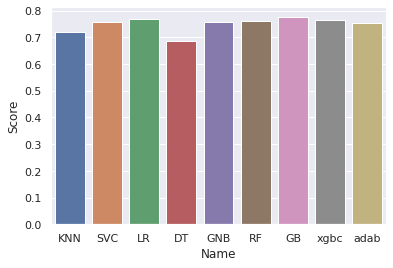

In [23]:
sns.barplot(x=kf_cross_val.Name,y=kf_cross_val.Score,data=kf_cross_val)
plt.show

In [24]:
from sklearn import metrics

In [25]:
for name,model in models:
    y_pred=model.predict(x_test)
    print("{0}".format(metrics.confusion_matrix(y_test,y_pred,labels=[1,0])))
    print(name)

[[ 32  30]
 [ 19 100]]
KNN
[[ 29  33]
 [ 14 105]]
SVC
[[ 37  25]
 [ 18 101]]
LR
[[39 23]
 [23 96]]
DT
[[38 24]
 [24 95]]
GNB
[[ 34  28]
 [ 14 105]]
RF
[[ 38  24]
 [ 17 102]]
GB
[[ 37  25]
 [ 15 104]]
xgbc
[[ 39  23]
 [ 17 102]]
adab


In [26]:
for name,model in models:
    y_pred=model.predict(x_test)
    print("{0}".format(metrics.classification_report(y_test,y_pred,labels=[1,0])))
    print(name)

              precision    recall  f1-score   support

           1       0.63      0.52      0.57        62
           0       0.77      0.84      0.80       119

    accuracy                           0.73       181
   macro avg       0.70      0.68      0.68       181
weighted avg       0.72      0.73      0.72       181

KNN
              precision    recall  f1-score   support

           1       0.67      0.47      0.55        62
           0       0.76      0.88      0.82       119

    accuracy                           0.74       181
   macro avg       0.72      0.68      0.68       181
weighted avg       0.73      0.74      0.73       181

SVC
              precision    recall  f1-score   support

           1       0.67      0.60      0.63        62
           0       0.80      0.85      0.82       119

    accuracy                           0.76       181
   macro avg       0.74      0.72      0.73       181
weighted avg       0.76      0.76      0.76       181

LR
        

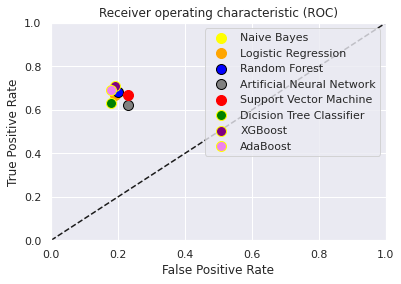

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# fpr, tpr
naive_bayes = np.array([0.20,0.68])
logistic = np.array([0.19,0.67])
random_forest = np.array([0.20, 0.68])
ann = np.array([0.23,0.62])
svm = np.array([0.23,0.67])
dt = np.array([0.18,0.63])
xgb=np.array([0.19,0.71])
ada=np.array([0.18,0.69])

#plotting
plt.scatter(naive_bayes[0], naive_bayes[1], label = 'Naive Bayes', facecolors='yellow', edgecolors='yellow', s=100)
plt.scatter(logistic[0], logistic[1], label = 'Logistic Regression', facecolors='orange', edgecolors='orange', s=100)
plt.scatter(random_forest[0], random_forest[1], label = 'Random Forest', facecolors='blue', edgecolors='black', s=100)
plt.scatter(ann[0], ann[1], label = 'Artificial Neural Network', facecolors='gray', edgecolors='black', s=100)
plt.scatter(svm[0], svm[1], label = 'Support Vector Machine', facecolors='red', edgecolors='red', s=100)
plt.scatter(dt[0], dt[1], label = 'Dicision Tree Classifier', facecolors='green', edgecolors='yellow', s=100)
plt.scatter(xgb[0], xgb[1], label = 'XGBoost', facecolors='purple', edgecolors='yellow', s=100)
plt.scatter(ada[0], ada[1], label = 'AdaBoost', facecolors='violet', edgecolors='yellow', s=100)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc='upper right')

plt.show()

In [30]:
print(pd.__version__)

1.0.5


In [31]:
print(np.__version__)

1.18.5


In [ ]:
print(plt.)